# SOM Self Organized Maps
### With Libraries: $\textit{somoclu}$

# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu

## Testing

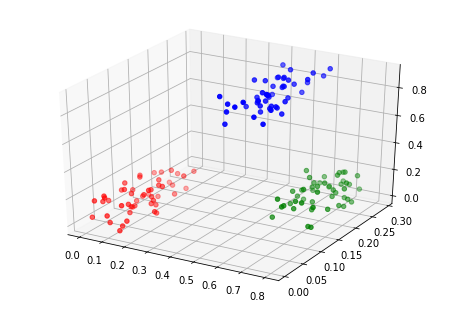

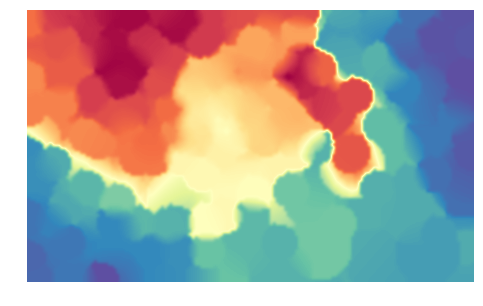

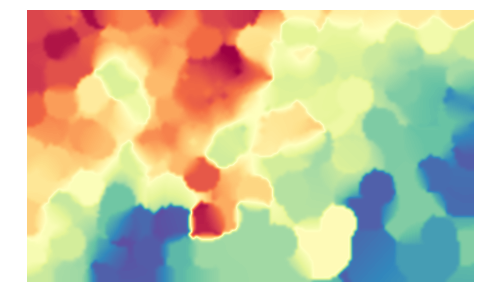

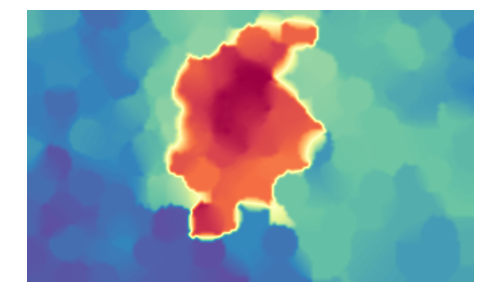

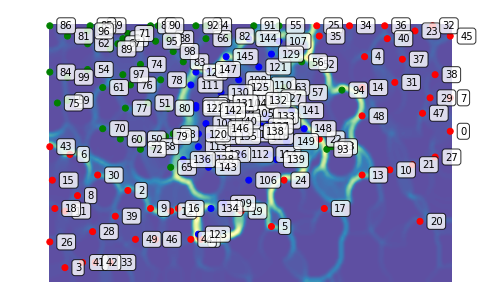

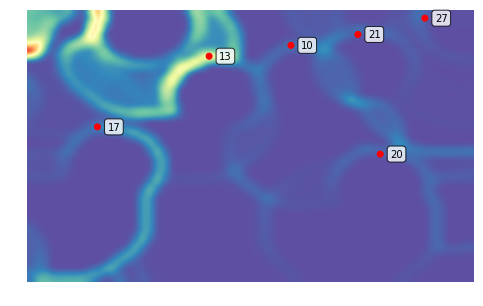

In [ ]:
# Generate data
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))

# Plot
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(150)
plt.show()

# Train
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
som.train()

som.view_component_planes()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels, zoom=((50, n_rows), (100, n_columns)))

# Tiroid topology (like Voronoi's tessalation)
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="toroid")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

# Clustering
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="toroid", initialization="pca")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

som.cluster()
som.view_umatrix(bestmatches=True)
